<center>
    <img src="https://ilic.cl/wp-content/uploads/2021/04/JOSE-ILIC_Mesa-de-trabajo-1-copia-14-e1619050976379-1024x254.png" width="300" alt="Logo Jose Ilic"  />
</center>


# Class 4: Data Visualization

Python has a great library for data visualization: `matplotlib`. This library is based on how the (proprietary) Matlab software generates images, which are usually of great quality and good design. Jupyter Notebook in particular is developed to work even better with `matplotlib` and, through direct commands in the notebook, we can specify how the images produced in the notebook will look like.

## Matplotlib basics

Matplotlib has 2 important layers to know:
- The text layer (procedural method)
- The art layer (object-oriented method)

\*\*Opción 1: Scripting layer - using matplotlib.pyplot as 'plt' \*\*

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example `plt.title(...)` to add a title or `plt.xlabel(...)` to add a name to the x-axis.

```python
    # Option 1
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Graph 1')
    plt.ylabel('Number of things used')
    plt.xlabel('Users')
```

\*\*Opción 2: Artist layer - Using the instance `Axes` de Matplotlib \*\*

You can use an `Axes` instance of the plot and store it in a variable (e.g. `ax`). You can add more elements via methods with a small change in syntax (adding `set_` to the previous methods). For example, you would use `ax.set_title()` instead of `plt.title()` to add a title, or `ax.set_xlabel()` instead of `plt.xlabel()` to add a name to the x-axis.

This option is sometimes more transparent and flexible for advanced plots, especially when working with multiple plots in one figure.

```python
    # option 2: preferred option with more flexibility
    ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

    ax.set_title('Immigration Trend of Top 5 Countries')
    ax.set_ylabel('Number of Immigrants')
    ax.set_xlabel('Years')
```

### Generating plots within Jupyter Notebook

To make plots inside the Notebook, we can use the inline backend `%matplotlib inline`. This is special to Jupyter Notebook.

Also for Python to generate the plot we must import the library
```Python
    import matplotlib as mpl
    import matplotlib.pyplot as plt
```

To check the latest version of matplotlib
```Python
    print('Matplotlib version: ', mpl.__version__) # >= 2.0.0
```

## Database

For this exercise we are going to use a UN immigration database. Before we can start we need to work on the data a bit so we can plot it.

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) form the UN website.

We will be needing Pandas and Numpy for this

In [2]:
import pandas as pd
import numpy as np

In [8]:
# Import data
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded added to the DataFrame!')

Data downloaded added to the DataFrame!


In [9]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [13]:
#Lets check column names so we know what to clean
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [14]:
# Cleaning data by deleting useless columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# We make all columns of type string
df_can.columns = list(map(str, df_can.columns))

# We make the courntries the index of the DF
df_can.set_index('Country', inplace=True)

# Lets add the "Total" column
df_can['Total'] = df_can.sum(axis=1)

# Finaly we create a list of years from 1980 to 2013 <-- usefull for some plots
years = list(map(str, range(1980, 2014)))

<ipython-input-14-987e8899009e>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [16]:
#Checking everything is allright
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Let's start with the Plots!

First we inport the libraries

In [17]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

### Line Plots

Lets see the case of inmigration form Haiti to Canada

In [18]:
# We get the data from Haiti
haiti = df_can.loc['Haiti', years] # we pass the years 1980 - 2013 to exclude the 'Total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

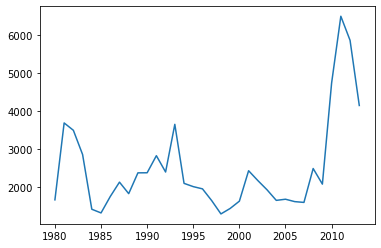

In [19]:
# Ploting with pandas is very very very easy
haiti.plot()

#### Lets add details!

The graph is looking boring, so we will add more information so we can actually read it

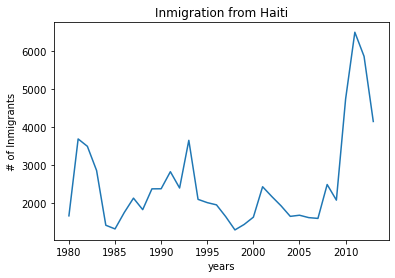

In [21]:
haiti.index = haiti.index.map(int) # Let's change the Haiti index values to integers for plotting
haiti.plot.line() # By adding .line() we ensure that matplotlib uses line graphs.
# haiti.plot(kind='line') # kind tells matplotlib what kind of graph we want to plot, in this case line.

plt.title('Inmigration from Haiti')
plt.ylabel('# of Inmigrants')
plt.xlabel('years')

plt.show() # Necesary to show the changes in the figure

We can keep adding stuff!

Lets use `plt.text(x, y, label)`:

Since we changed the x-axis (years) to integer, we can specify the value of x as a year. The y-axis (number of immigrants) was already integer, so we can use any number within the values, in this case y = 6000.

```python
    plt.text(2000, 6000, '2010 earthquake') # years is in type integer
```

If years were stored as string, we would need to specify the x-axis position as the index position of the year. e.g. 20th index is the year 2000.

```python
    plt.text(20, 6000, '2010 Earthquake') # years is in string type
```


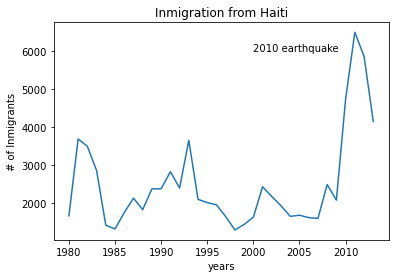

In [22]:
haiti.index = haiti.index.map(int) # Let's change the haiti index values to integers for plotting
# haiti.plot.line() # By adding .line() we make sure that matplotlib uses line graphs.
haiti.plot(kind='line') # kind tells matplotlib what kind of graph we want to plot, in this case line.

plt.title('Inmigration from Haiti')
plt.ylabel('# of Inmigrants')
plt.xlabel('years')
plt.text(2000, 6000, '2010 earthquake')

plt.show() # Necesary to show the changes in the figure

Lets do two countries now

China & India

In [23]:
df_CI = df_can.loc[['China','India'], years] # we use the years 1980 - 2013 to exclude the 'Total' column
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<AxesSubplot:xlabel='Country'>

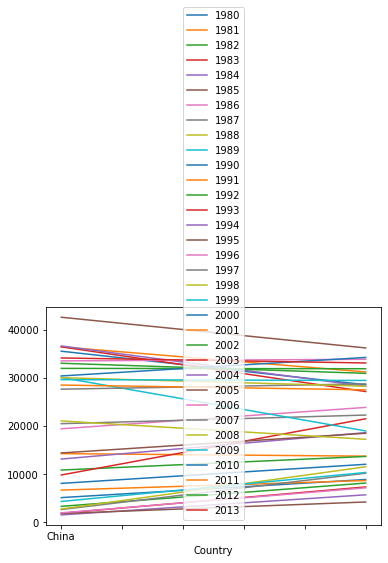

In [24]:
df_CI.plot.line()

Clearly there is something fishy going on here.

Recall that *pandas* plots indices on the x-axis and columns as individual lines on the y-axis. Since `df_CI` is a DF with `country` as the index and `years` as the columns, we must first transpose the DF to swap columns for indices.

In [25]:
df_CI = df_CI.transpose()

<AxesSubplot:>

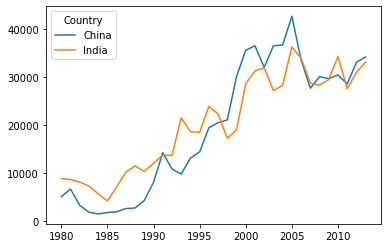

In [26]:
df_CI.plot.line()

It is not recommended to use more than 5 lines in a line graph. This is due to information saturation.

Let's see what a 5-line graph would look like with the 5 countries with the most immigration to Canada.

In [27]:
#1: We get the data from the 5 countries. Remember that we created a Total column per country.
# We are going to sort under this column to get the 5 countries that have the most immigration.

df_can_sorted = df_can.sort_values(by='Total', ascending=False, axis=0)

# we take the top 5
df_top5 = df_can_sorted.head(5)

# Trnaspose them
df_top5 = df_top5[years].transpose() 

df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


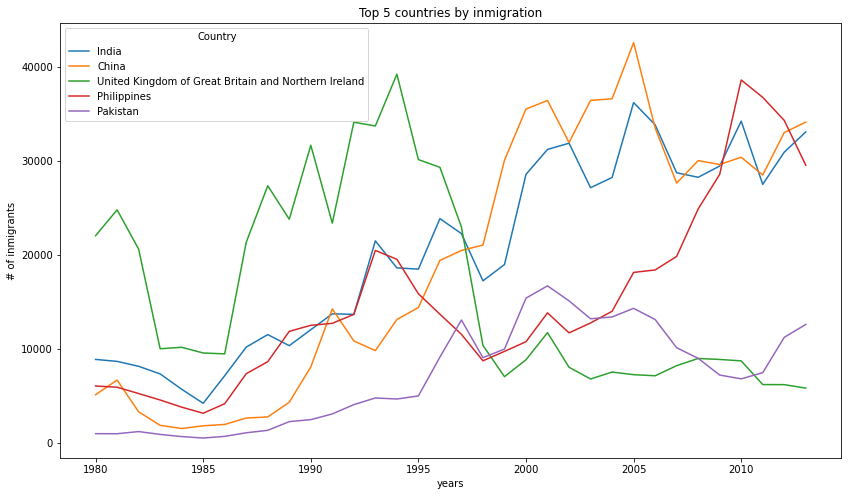

In [28]:
# 2: PLoting
df_top5.index = df_top5.index.map(int) # We change the index values to integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # figsize allows us to choose the size of the figure. A tuple (x,y) is used

plt.title('Top 5 countries by inmigration')
plt.ylabel('# of inmigrants')
plt.xlabel('years')


plt.show()

### Area Plots

Area charts are also known as stacked line plots. They allow for a more comfortable display for charts with many lines like the one above.

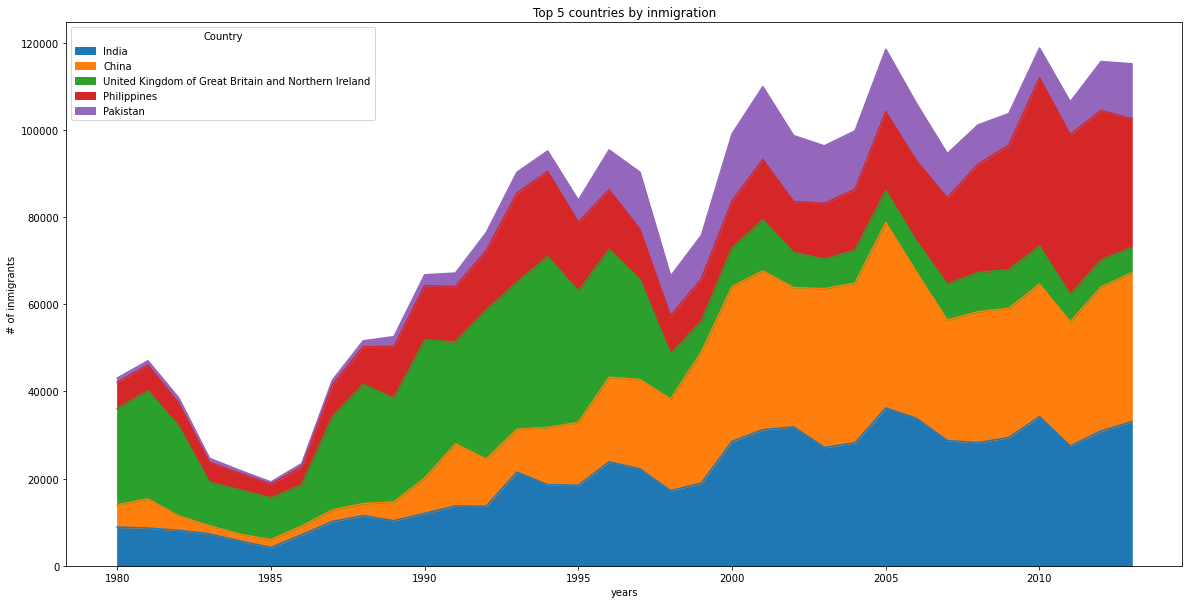

In [29]:
df_top5.plot.area(figsize=(20, 10)) 

plt.title('Top 5 countries by inmigration')
plt.ylabel('# of inmigrants')
plt.xlabel('years')
plt.show()

Area charts are automatically stacked. And to produce a stacked chart, each column must have all positive values or all negative values (all NaNs go to 0). To make a non-stacked chart we set the parameter `stacked=Flase`

The non-stacked chart has an automatic transparency of 0.5 (from 0 to 1). Transparency in matplotlib is called the parameter alpha.

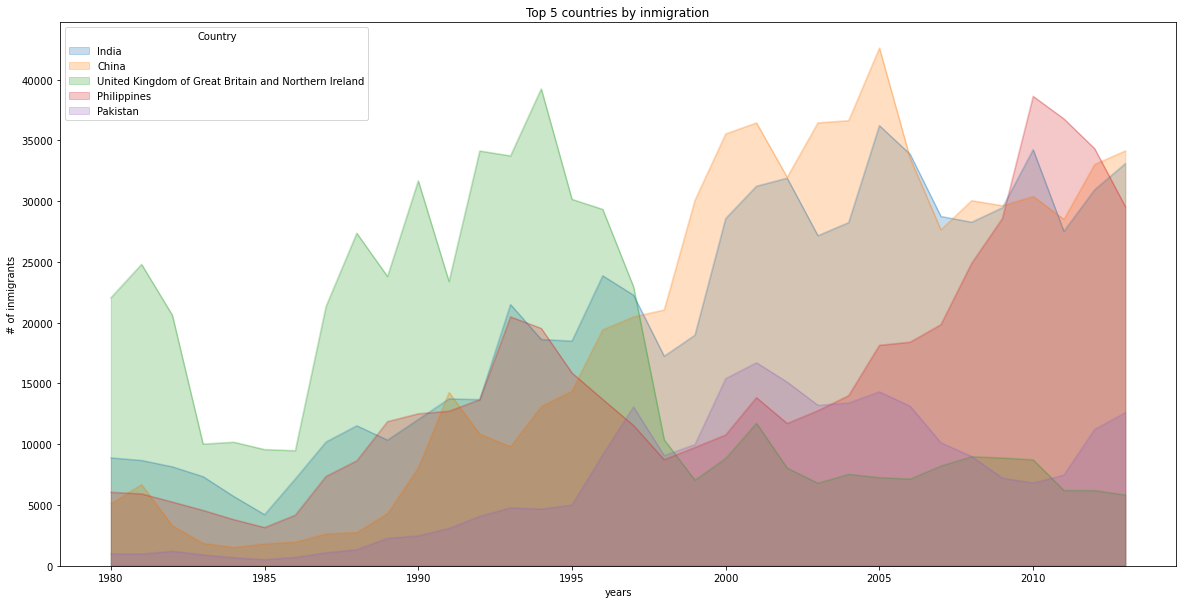

In [30]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, preset aplha is = 0.5
             stacked=False,
             figsize=(20, 10))
plt.title('Top 5 countries by inmigration')
plt.ylabel('# of inmigrants')
plt.xlabel('years')
plt.show()

### Histograms

A histogram is a way of representing the *frequency* distribution of a numerical dataset. The way it works is by partitioning the x-axis into bins, then assigning each data point to a bin, and then counting the number of data points that were assigned to each bin. So the y-axis is the frequency or number of data points in each bin. Note that we can change the size of the bins and one usually needs to play around a bit to get the distribution to look nice.

Before proceeding with the histogram, we need to examine the data distributed in intervals. For this we will use the `histogram` method of **Numpy** to obtain the bin sizes and frequency counts.

Let's look at the case of immigration in the year 2013.

In [31]:
# np.histogram returns two values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # count of frequency
print(bin_edges) # range of the bins, preset is = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Now we can easily plot

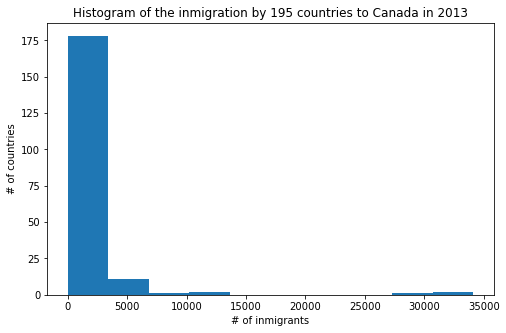

In [33]:
df_can['2013'].plot.hist(figsize=(8, 5))

#Title
plt.title('Histogram of the inmigration by 195 countries to Canada in 2013')
# y Axis
plt.ylabel('# of countries')
# x Axis
plt.xlabel('# of inmigrants')

plt.show()

In the plot above the x-axis represents the range of immigrant population in intervals of 3412.9. The y-axis represents the number of countries that contributed to the above population.

Note that the numbers on the x-axis do not match the box sizes. This can be fixed by using `xticks` which contains the list of box sizes.

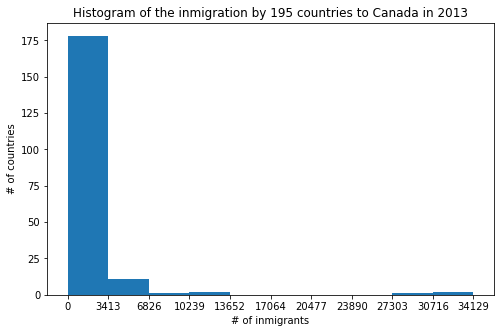

In [34]:
count, bin_edges = np.histogram(df_can['2013'])
df_can['2013'].plot.hist(figsize=(8, 5),xticks=bin_edges)

#Title
plt.title('Histogram of the inmigration by 195 countries to Canada in 2013')
# y Axis
plt.ylabel('# of countries')
# x Axis
plt.xlabel('# of inmigrants')
plt.show()

#### Multiple Histograms

Let's see what happens if we make a histogram for 3 countries for example

<AxesSubplot:ylabel='Frequency'>

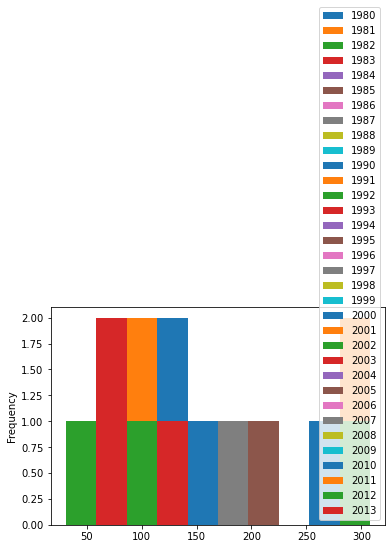

In [35]:
# Histogram for Denmark, Norway and Sweden
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Clearly this doesn't look right. Again we have the problem that the years are the wrong axis. Let's do the transposition.

In [36]:
# We create a DF with the data from Denmark, Norway and Sweden. Then we transpose it
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

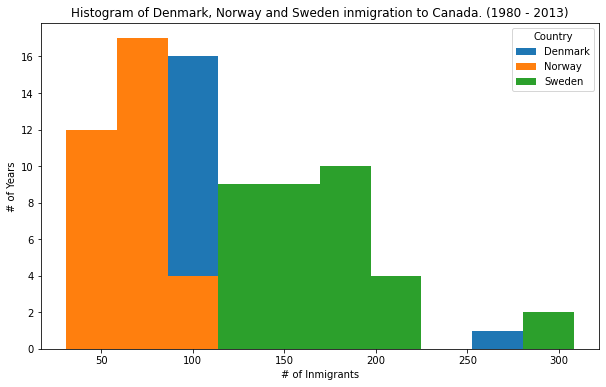

In [37]:
# Histogram
df_t.plot.hist(figsize=(10, 6))

plt.title('Histogram of Denmark, Norway and Sweden inmigration to Canada. (1980 - 2013)')
plt.ylabel('# of Years')
plt.xlabel('# of Inmigrants')

plt.show()

Let's make some changes to make it look better:

* Increase the box size to 15 with the bins parameter
* Set the transparency to 60% with the alpha parameter
* Add x-axis
* Change the color of the plots with the color parameter

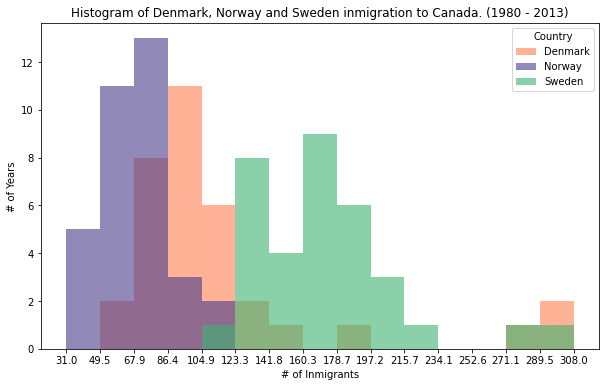

In [38]:
# Values for x-tcicks
count, bin_edges = np.histogram(df_t, 15)

# histogram un-stacked
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Denmark, Norway and Sweden inmigration to Canada. (1980 - 2013)')
plt.ylabel('# of Years')
plt.xlabel('# of Inmigrants')

plt.show()

Dato: para una lista de colores completa de Matplotlib, ejecutar el siguiente código


```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


In [39]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


If we don't want the plots to overlap, we can use the `stacked` parameter. We can also adjust the minimum and maximum of the x-axis to eliminate ugly gaps at the edges of the plot. For that we use a (min,max) tuple using the `xlim` parameter.

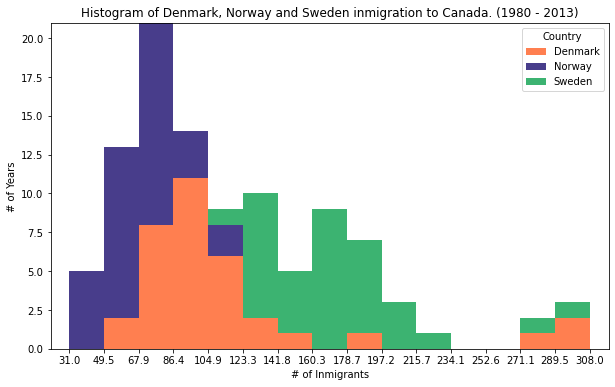

In [40]:
# Values for x-tcicks
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   # first bin value is 31.0, we add a buffer of 10 for aesthetics
xmax = bin_edges[-1] + 10  # last bin value is 308.0, we add a buffer of 10 for aesthetics

# histogram stacked
df_t.plot.hist(figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Denmark, Norway and Sweden inmigration to Canada. (1980 - 2013)')
plt.ylabel('# of Years')
plt.xlabel('# of Inmigrants')

plt.show()

### Bar Plots

A bar chart is a way of representing data where the *length* of the bar represents the magnitude/size of the variable/characteristic. Bar charts usually represent numerical or categorical variables grouped into intervals.

To create a bar chart, we can pass two types of arguments in the `kind` parameter of `plot()`:

* `kind=bar` *vertical* bar chart
* `kind=barh` *horizontal* bar chart

**Vertical**

In the vertical bar chart, the x-axis is used for labeling, and the length of the bars on the y-axis corresponds to the magnitude of the measured variable. Bar charts are particularly useful when using time series data. One disadvantage is that they do not have room for labeling text at the bottom of each bar.

**Let's analyze the Chilean dictatorship**

The Chilean dictatorship from 1973 to 1990 was a huge event politically and economically speaking. How did it affect immigration to Canada?

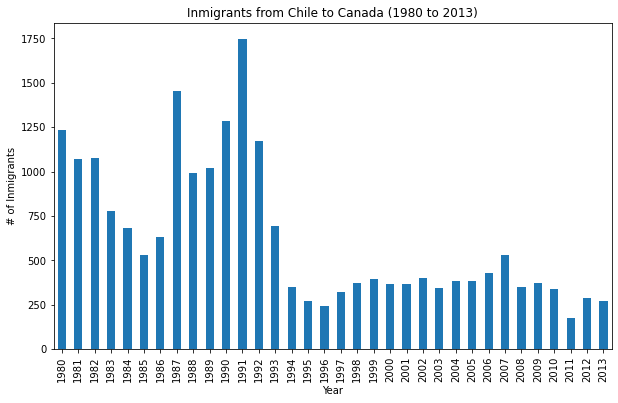

In [42]:
# First the data
df_Chile = df_can.loc['Chile', years]

# Lets Plot
df_Chile.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # X axis
plt.ylabel('# of Inmigrants') # Y axis
plt.title('Inmigrants from Chile to Canada (1980 to 2013)') # Title

plt.show()

Let's add annotations to the plot using the `annotate` method of the **scripting layer**. We'll need the following parameters:

* `s`: str, the annotation text.
* `xy`: Tuple specifying the point (x,y) to annotate (in this case, the end point of the arrow).
* `xytext`: Tuple specifying the point (x,y) to place the text (in this case, the start point of the arrow).
* `xycoords`: The coordinate system in which xy are given - 'data' uses the coordinate system of the object being annotated (default).
* `arrowprops`: Takes a dictionary with the properties to draw the arrow:
* `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow
* `connectionstyle`: Specifies the connection type. `arc3` is straight line.
* `color`: Color of the arrow
* `lw`: Line width.

For more details about annotations, see the Matplotlib documentation:
http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate.

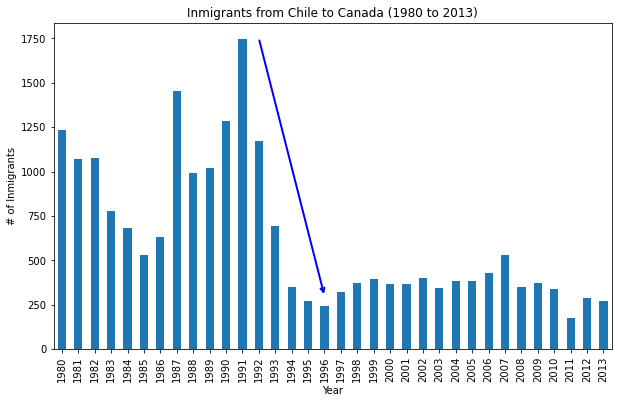

In [45]:
# Ploting
df_Chile.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # X axis
plt.ylabel('# of Inmigrants') # Y axis
plt.title('Inmigrants from Chile to Canada (1980 to 2013)') # Title

# Annotate the arrow
plt.annotate('',  # s: str. white for no text
             xy=(16, 300),  # head of the arrow at point (year 1996 , pob 300)
             xytext=(12, 1750),  # base of the arrow at point (year 1992 , pob 1750)
             xycoords='data',  # We use the coordinate systemn of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's add some text that goes above the arrow. To do this, we pass the following parameters:

* `rotation`: text rotation angle in degrees (counterclockwise)
* `va`: Vertical text alignment \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
* `ha`: Horizontal text alignment \[‘center’ | ‘right’ | ‘left’]

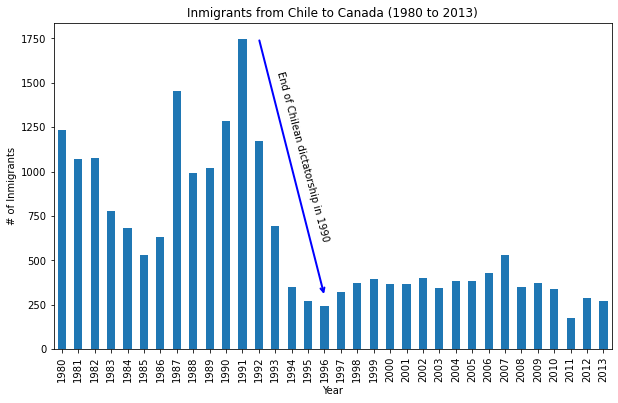

In [65]:
# Ploting
df_Chile.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # X axis
plt.ylabel('# of Inmigrants') # Y axis
plt.title('Inmigrants from Chile to Canada (1980 to 2013)') # Title

# Annotate the arrow
plt.annotate('',  # s: str. white for no text
             xy=(16, 300),  # head of the arrow at point (year 1996 , pob 300)
             xytext=(12, 1750),  # base of the arrow at point (year 1992 , pob 1750)
             xycoords='data',  # We use the coordinate systemn of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate the text
plt.annotate('End of Chilean dictatorship in 1990',  # Display text
             xy=(13, 600),  # text ends in point (year 1993 , pob 600)
             rotation=-75,  # Trail and error to match the arrow 
             va='bottom',  # we want the text to be aligned vertically 'bottom'
             ha='left',  # we want the text to be aligned horizontaly'left'
             )

plt.show()

#### Horizontal Bar Charts

Let's look at the case of the 15 countries with the most immigration to Canada. It is much more convenient to plot them in horizontal bar graphs so that the name of each country can be easily read.

In [66]:
# We sort the data in ascending order for the total column
df_top15 = df_can.sort_values(by='Total', ascending=True).tail(15)
df_top15 = df_top15['Total']
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

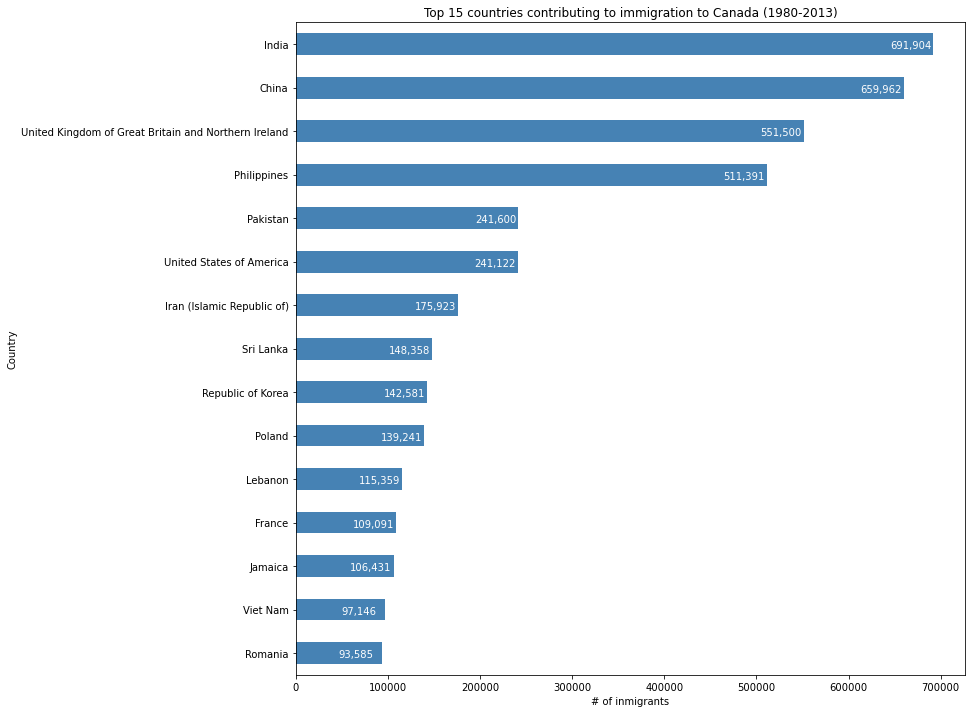

In [67]:
# Ploting
df_top15.plot.barh(figsize=(12, 12), color='steelblue')
plt.xlabel('# of inmigrants')
plt.title('Top 15 countries contributing to immigration to Canada (1980-2013)')

# Annotate the labels for each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # We format the integers with comas

# Add text to the end of the bar (subtracting 47000 from x, and 0.1 from y so it fits nicely in the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

### Pie Charts

A `pie chart` is a circular graph that shows numerical proportions by dividing the circle (pie) into proportional pieces. Let's use a pie chart to see the proportion (percentage) of immigrants by continent over the entire period 1980 - 2013.

In [68]:
# Group by continent and add
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a 'groupby' object
# we can't use it any further until we apply a function (e.g. .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


We plot the data. We will use 'pie' for the `kind` parameter, along with these other parameters:

* `autopct` - This is a string or function used to label the edges with numeric values. The label will be placed inside the edge. If it is not a string format, the label will be `fmt%pct`.
* `startangle` - Rotates the start of the pie by an angle in degrees counter-clockwise to the x-axis
* `shadow` - Creates a shadow under the pie (3D effect).

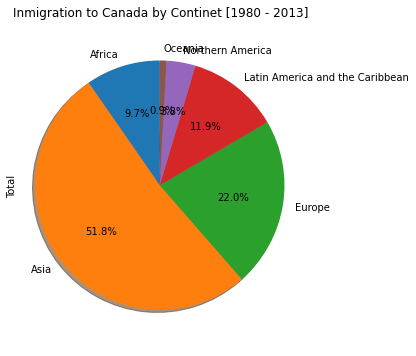

In [70]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot.pie(figsize=(5, 6),
                            autopct='%1.1f%%', # add percentages
                            startangle=90,     # Start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Inmigration to Canada by Continet [1980 - 2013]')
plt.axis('equal') # so it looks like a circle

plt.show()

It clearly doesn't look right. The numbers are overlapping. Let's make some modifications:

* Let's remove the text from the labels on the pie with `legend` and add it separately using `plt.legend()`.
* Let's push the percentages so they're just outside the pie with the `pctdistance` parameter.
* Let's use cooler colors for the continents with the `colors` parameter.
* Let's **explode** the pie to emphasize the three smaller continents (Africa, North America, and Latin America and Caribbean) with the `explode` parameter.

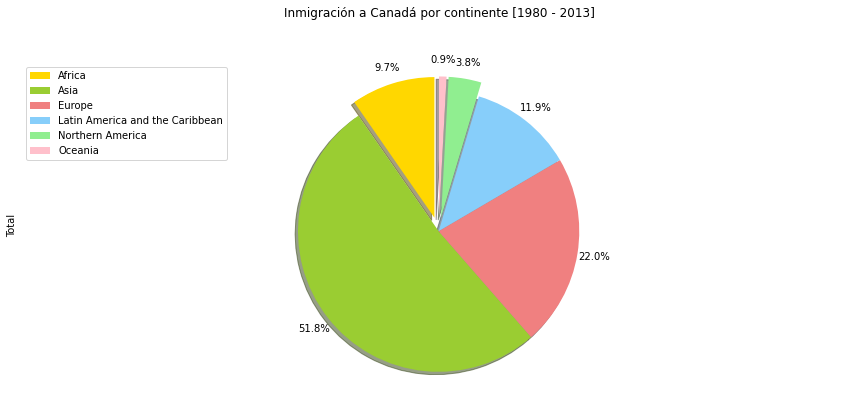

In [71]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # Ration for each continent being exploded

df_continents['Total'].plot.pie(figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # no labels
                            pctdistance=1.12,    # The ratio between the center of each pie and the start of the text generated by autopct 
                            colors=colors_list,  # colors!
                            explode=explode_list # 'explode' the three smaller continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Inmigración a Canadá por continente [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') # we add the legend and where it will be located

plt.show()

### Boxplots

Boxplots are a way of representing the statistics of a data distribution across 5 dimensions

* **Minimum:** The smallest number in the data that does not include the outliers
* **First Quartile:** The middle number between the minimum and the median
* **Second Quartile (Median):** The middle number between the median and the maximum
* **Third Quartile:** The middle number between the median and the maximum
* **Maximum:** The largest number in the data set excluding the outliers.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, aling="center">

An outlier is a number that is located from the third or first quartile at a distance of IQR*1.5

Let's see what a box graph for Chile looks like.

In [72]:
df_chile = df_can.loc[['Chile'],years].transpose()
df_chile.head()

Country,Chile
1980,1233
1981,1069
1982,1078
1983,781
1984,681


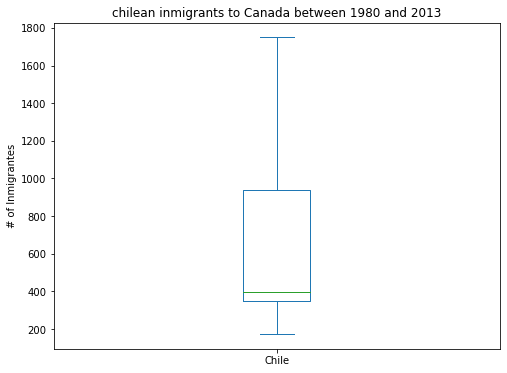

In [74]:
# Ploteamos

df_chile.plot.box(figsize=(8,6))

plt.title('chilean inmigrants to Canada between 1980 and 2013')
plt.ylabel('# of Inmigrantes')
plt.show()

In [75]:
df_chile.describe()

Country,Chile
count,34.000000
mean,628.205882
std,405.464625
min,174.000000
25%,350.500000
50%,399.000000
75%,937.750000
max,1749.000000


 #### Multiple Boxplots
 
Let us plot the data for China and India in box plots.

In [76]:
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [77]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


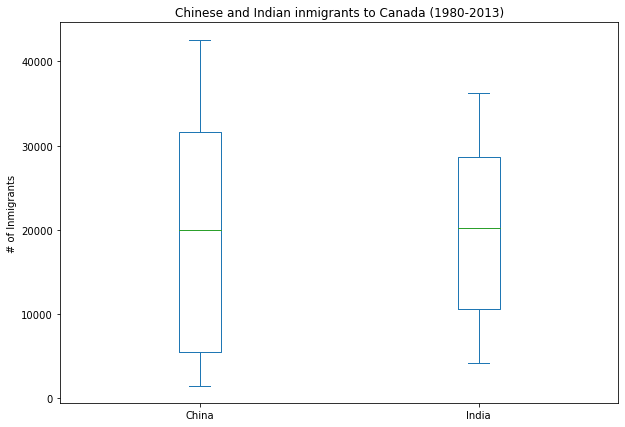

In [78]:
df_CI.plot.box(figsize=(10,7))

plt.title('Chinese and Indian inmigrants to Canada (1980-2013)')
plt.ylabel('# of Inmigrants')
plt.show()

#### Horizontal Boxplots

We are going to put the graphics horizontally and also add colors.

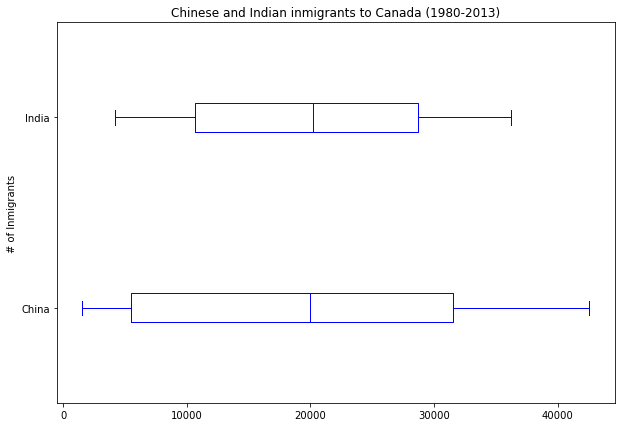

In [79]:
df_CI.plot.box(figsize=(10,7), color='blue', vert=False)

plt.title('Chinese and Indian inmigrants to Canada (1980-2013)')
plt.ylabel('# of Inmigrants')
plt.show()

### Subplots!!

Subplots allow you to have several different graphs in a single figure (image). This is super useful when you have to send papers to journals and they ask for a maximum of images.

To work with subplots it is necessary to use the artistic layer (artist layer). To visualize all the subplots we must create a figure (canvas) and divide it into subplots. Each subplot contains a plot.

A typical syntax would be something like this

```Python
fig = plt.figure() #create the figure
ax = fig.add_subplot(N_rows, N_cols, N_plot) #create the subplot
```

Where

* The N_Rows and N_Cols are used only as a notion to divide the figure into (rows*columns) sub_axes
* N_plot will be used to identify which plot we are plotting, the exact location of the division we made. Starts at 1 and ends at N_rows*N_columns

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=440, aling="center">

We can specify which subplot we are going to plot in using the `ax` parameter in the `plot` method.

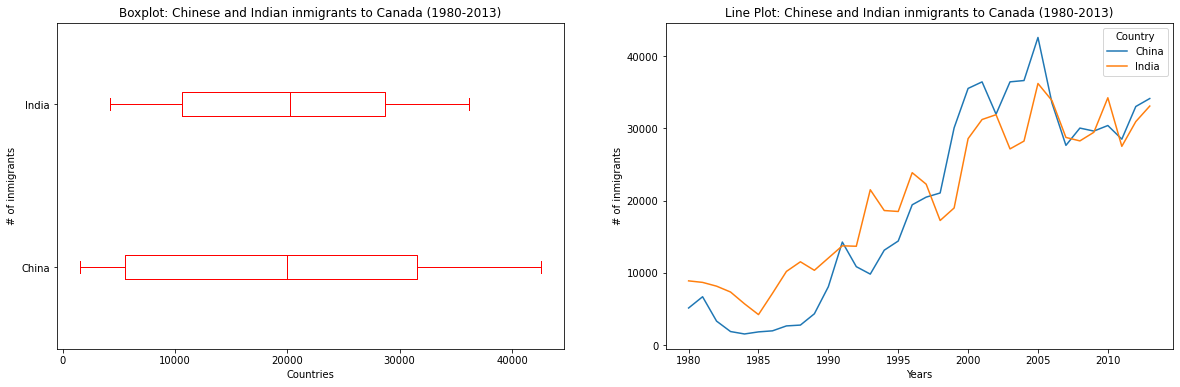

In [80]:
fig = plt.figure() #make the figure

ax1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, 1rst plot)
ax2 = fig.add_subplot(1,2,2) # add subplot 2 (1 fila, 2 columnas, 2do plot)

#Subplot 1: Box
df_CI.plot.box(color='red', vert=False, figsize=(20,6), ax=ax1) #add to subplot 1
ax1.set_title('Boxplot: Chinese and Indian inmigrants to Canada (1980-2013)')
ax1.set_ylabel('# of inmigrants')
ax1.set_xlabel('Countries')

#Subplot 1: Lines
df_CI.plot.line(figsize=(20,6), ax=ax2) #add to subplot 2
ax2.set_title('Line Plot: Chinese and Indian inmigrants to Canada (1980-2013)')
ax2.set_ylabel('# of inmigrants')
ax2.set_xlabel('Years')

plt.show()

#### Subplot convention!

When N_rows, N_cols and N_plots are less than 10, there is a convention that allows writing the three numbers as a single 3-digit number. Where the row is the hundredth, the column is the tenth and the plot number is the unit.

```Python
subplot(211) == subplot(2,1,1)
```

### Scatter plots

Scatter plots are similar to line plots but the points are not connected by a line. Dependent variables are mapped onto a separate axis in a 2D graph. Scatter plots are designed to show trends, using mathematical analysis to calculate the relationship between points and perhaps predict outcomes outside the dataset.

Using a scatter plot, let's look at the trend of total immigration to Canada in the years 1980 - 2013.

In [81]:
# Data
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [83]:
# index to integers
df_tot.index = map(int,df_tot.index)
df_tot.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [84]:
# Reset the index
df_tot.reset_index(inplace=True)
df_tot.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [85]:
# Rename columns
df_tot.columns= ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


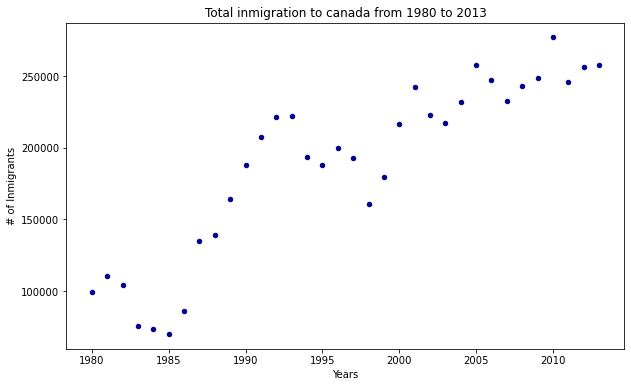

In [86]:
df_tot.plot.scatter(x= 'year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total inmigration to canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('# of Inmigrants')
plt.show()

We notice that this graph shows us the immigration trend of Canada in the period 1980 - 2013. Let's fit a curve to this trend with numpy. For this we need:

* Polyfit command
* x coordinates gives the data for polyfit
* y coordinate of the data for polyfit
* degree of the polynomial for polyfit called `deg`, where 1=linear, 2=quadratic, etc.

In [87]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x,y,deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

Lets add the fit to the previous plot

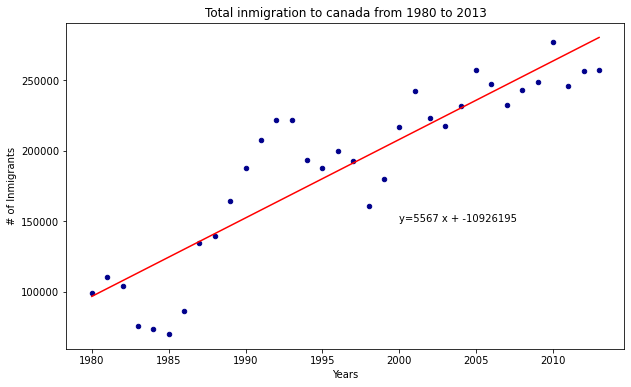

'N of inmigrants = 5567 x + -10926195'

In [89]:
df_tot.plot.scatter(x= 'year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total inmigration to canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('# of Inmigrants')

#plot the best fit
plt.plot(x, fit[0]*x + fit[1], color='red') #remember x are years.
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0],fit[1]), xy=(2000,150000))

#add text to best fit
plt.show()
'N of inmigrants = {0:.0f} x + {1:.0f}'.format(fit[0],fit[1])